# Data Visualization / EDA - New York School Data

To see the code used to data clean and feature engineer, please click [here](https://github.com/jacquelinekclee/data_cleaning_exploration_nyc_schools_sat/blob/master/data_cleaning_sat_ny.ipynb).

This notebook will focus on exploratory data analysis and data visualization. This is the last step before modeling.

## Table of Contents
- [Collect descriptive statistics](#stats)
    - [Draw boxplot](#boxplot1)
- [Some additional feature engineering](#bh_aw)
- Visualizing SAT score breakdowns by:
    - [Ethnic majority of schools](#bar_eth)
    - [Low-income population of schools (based on how many students receive free/reduced lunch)](#bar_frl)
    - [Percent of enrolled students who took SAT](#bar_enrolled)
- [Score breakdowns by schools with majority Black/Hispanic students versus schools without Black/Hispanic majority](#bh_vs)
- [Comparing distributions](#distribs)
    - [Schools with predominantly Black/Hispanic students](#distrib_bh)
    - [Schools with predominantly Asian/White students](#distrib_bh)
    - [Majority Black/Hispanic schools vs. nationwide](#bh_nation)
    - [Majority Asian/White schools vs. nationwide](#aw_nation)
    - [Majority Black/Hispanic schools vs. majority Asian/White schools](#bh_aw_distrib)
    - [Socioeconomic class of students (based on how many students receive free/reduced lunch)](#frl_distrib)
    - [Schools of the 5 boroughs](#borough_distrib)

#### Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
sat_demos = pd.read_csv('sat_demos_cleaned.csv')
sat_demos.head()

,DBN,SCHOOL NAME,Percent of Students Enrolled Who Took SAT,SAT Composite Avg. Score,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Composite Avg. Raw Score,frl_percent,asian_per,black_per,hispanic_per,white_per
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,6.9,600-1220,200-400,200-410,200-390,1122.0,88.6,14.0,29.1,53.8,1.7
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,23.1,600-1220,200-400,420-510,200-390,1172.0,71.8,29.2,22.6,45.9,2.3
2,01M450,EAST SIDE COMMUNITY SCHOOL,11.7,600-1220,200-400,200-410,200-390,1149.0,71.8,9.7,23.9,55.4,10.4
3,01M458,FORSYTH SATELLITE ACADEMY,3.1,600-1220,410-490,200-410,200-390,1174.0,72.8,2.2,34.4,59.4,3.6
4,01M509,MARTA VALLE HIGH SCHOOL,12.0,600-1220,200-400,420-510,200-390,1207.0,80.7,9.3,31.6,56.9,1.6


### Descriptive Statistics<a class="anchor" id="stats"></a> 

In [3]:
frl_stats = sat_demos['frl_percent'].describe()
frl_mean = frl_stats['mean']
frl_std = frl_stats['std']
frl_min = frl_stats['min']
frl_max = frl_stats['max']
frl_med = frl_stats['50%']
frl_stats = (pd.DataFrame(data={'% Students Receiving Free/Reduced Lunch':[frl_mean, frl_std, frl_med, frl_min, frl_max]},
                         index = ['Mean', 'Standard Deviation', 'Median', 'Minimum', 'Maximum']))
frl_stats

,% Students Receiving Free/Reduced Lunch
Mean,66.515556
Standard Deviation,15.982608
Median,69.800000
Minimum,15.800000
Maximum,100.000000


In [4]:
sat_raws_stats = sat_demos['SAT Composite Avg. Raw Score'].describe()
nyc_mean = sat_raws_stats['mean']
nyc_std = sat_raws_stats['std']
nyc_min = sat_raws_stats['min']
nyc_max = sat_raws_stats['max']
nyc_med = sat_raws_stats['50%']
nyc_sat_stats = (pd.DataFrame(data={'SAT Composite Score':[nyc_mean, nyc_std, nyc_med, nyc_min, nyc_max]},
                         index = ['Mean', 'Standard Deviation', 'Median', 'Minimum', 'Maximum']))
nyc_sat_stats

,SAT Composite Score
Mean,1205.926667
Standard Deviation,168.488317
Median,1169.000000
Minimum,887.000000
Maximum,2096.000000


<a class="anchor" id="boxplot1"></a> 

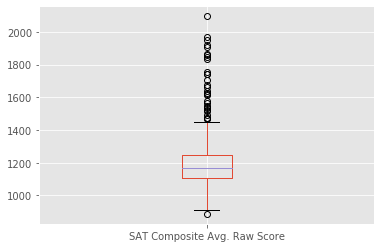

In [5]:
sat_demos.boxplot(column='SAT Composite Avg. Raw Score')

<a class="anchor" id="bh_aw"></a> 
To make the visualizations and analysis more meaningful and easier to follow, I will add columns denoting the majority population of a school: either majority Black/Hispanic or majority Asian/White.
- Values in the columns will be 100s and 0s (100 = True, 0 = False).
- 100 instead of 1 will be used so that the formatting is similar to the existing data.

The 'black_per' and 'hispanic_per' columns will be replaced by 'black_hispanic_per.' Similarly, 'asian_per' and 'white_per' will be replaced by 'asian_white_per.' 

The similarities between bar heights for 'black_per' and 'hispanic_per' and 'asian_per' and 'white_per' show that the grouping Black/Hispanic and Asian/White is appropriate.

Below is an example of a graph that uses the raw ethnicity percentages (what the new columns will replace). 

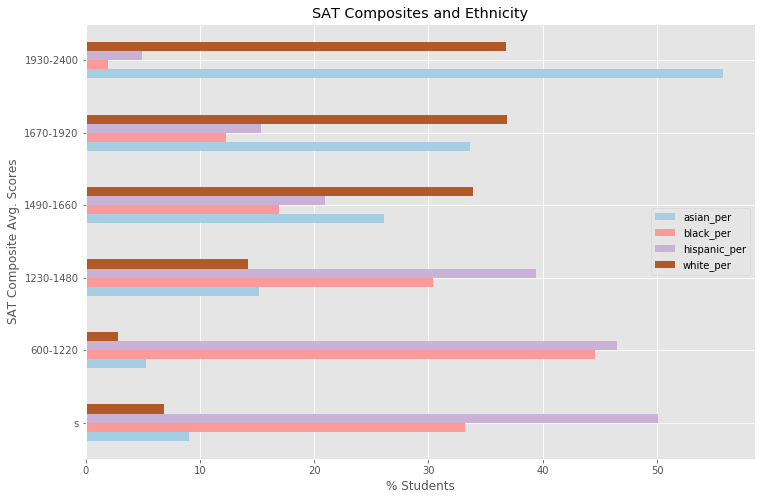

In [6]:
#create the new columns
sat_demos['black_hispanic_per'] = sat_demos['black_per'] + sat_demos['hispanic_per']
sat_demos['asian_white_per'] = sat_demos['asian_per'] + sat_demos['white_per']
#create columns to be used for grouping 
sat_demos['Black/Hispanic'] = 0
sat_demos['Asian/White'] = 0

In [7]:
#fill in new columns
for i, row in sat_demos.iterrows():
    if row['black_hispanic_per'] >= 50.0:
        sat_demos.at[i,'Black/Hispanic'] = 100
    else:
        sat_demos.at[i,'Asian/White'] = 100
sat_demos = sat_demos.drop(columns=['asian_per', 'black_per', 'hispanic_per', 'white_per'])
sat_demos.head()

,DBN,SCHOOL NAME,Percent of Students Enrolled Who Took SAT,SAT Composite Avg. Score,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Composite Avg. Raw Score,frl_percent,black_hispanic_per,asian_white_per,Black/Hispanic,Asian/White
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,6.9,600-1220,200-400,200-410,200-390,1122.0,88.6,82.9,15.7,100,0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,23.1,600-1220,200-400,420-510,200-390,1172.0,71.8,68.5,31.5,100,0
2,01M450,EAST SIDE COMMUNITY SCHOOL,11.7,600-1220,200-400,200-410,200-390,1149.0,71.8,79.3,20.1,100,0
3,01M458,FORSYTH SATELLITE ACADEMY,3.1,600-1220,410-490,200-410,200-390,1174.0,72.8,93.8,5.8,100,0
4,01M509,MARTA VALLE HIGH SCHOOL,12.0,600-1220,200-400,420-510,200-390,1207.0,80.7,88.5,10.9,100,0


In [8]:
#save df to csv for future use
sat_demos.to_csv('sat_demos_model', index=False)

<a class="anchor" id="bar_eth"></a> 
### SAT Composite Scores & Ethnicity

In [9]:
#group by composite score range and get mean percentages for each demographic column
composite_demos_grouped_unsorted = sat_demos.groupby('SAT Composite Avg. Score').mean()
composite_demos_indices = list(composite_demos_grouped_unsorted.index.values)

In [10]:
#order the rows based on index (score range)
composite_demos_indices.sort(key = lambda s: 0 if s == 's' else int(s[-4:]))

In [11]:
#use reordered rows to make new dataframe
composite_demos_grouped = (pd.DataFrame(index=composite_demos_indices,
                                        columns=composite_demos_grouped_unsorted.columns))
for index in composite_demos_indices:
    composite_demos_grouped.loc[index] = composite_demos_grouped_unsorted.loc[index]

For suppressed data points ('s'), 0 was used to fill 'Percent of Students Enrolled Who Took' because schools with suppressed data points indicate < 5 test takers.

In [12]:
composite_demos_grouped

,Percent of Students Enrolled Who Took SAT,SAT Composite Avg. Raw Score,frl_percent,black_hispanic_per,asian_white_per,Black/Hispanic,Asian/White
s,0,1169,70.8658,83.2579,15.9158,89.4737,10.5263
600-1220,12.6175,1123.05,71.9857,91.1381,8.16958,96.8531,3.14685
1230-1480,15.5616,1320.45,58.7889,69.7788,29.3596,74.7475,25.2525
1490-1660,18.0846,1573.08,35.0769,37.8231,60.0077,15.3846,84.6154
1670-1920,22.7818,1805.45,26.6909,27.6818,70.5,0,100
1930-2400,23.3667,2006,27.1667,6.9,92.6,0,100


Bar plot below shows the average ethnic breakdown of a school for each SAT composite score range

- For example, the student body of schools whose mean SAT score is in the 1230-1480 range is on average about 70% Black/Hispanic and 30% Asian/White.

Text(0, 0.5, 'SAT Composite Avg. Scores')

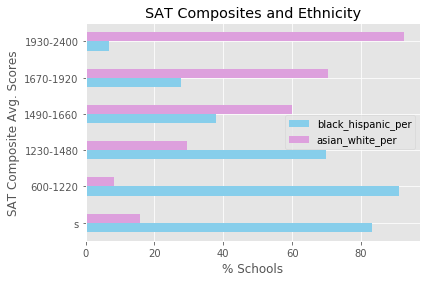

In [13]:
composite_maj = (composite_demos_grouped[['black_hispanic_per', 'asian_white_per']].
                 plot.barh(rot = 0, title = 'SAT Composites and Ethnicity',
                          color=['skyblue', 'plum']))
plt.xlabel("% Schools")
plt.ylabel("SAT Composite Avg. Scores")

- The boxplot below indicates that for schools that score highest on average, they typically have a very small Black/Hispanic student population. 
- This does not seem to vary for top-scoring schools, as seen by the short whisker length. 
- Schools that score the lowest on average have a very high Black/Hispanic student population. This typical range is also fairly small, but there are a lot of outliers, demonstrating that NYC schools of all different ethnic breakdowns score lower on average.
- The boxplots for the 2 highest score ranges (shown in middle) have the shortest lengths of all the other boxplots, potentially hinting that the top-scoring schools in NYC have lower ethnic diversity than other schools.

Text(0, 0.5, 'black_hispanic_per')

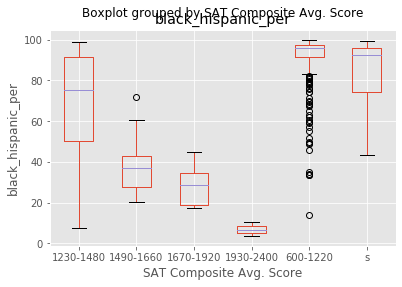

In [14]:
sat_demos.boxplot(by = 'SAT Composite Avg. Score', column = ['black_hispanic_per'])
plt.ylabel('black_hispanic_per')

<a class="anchor" id="bar_frl"></a> 
### SAT Composite Scores & Socioeconomic Class

The bar plot below demonstrates the average percentage of free/reduced price lunch recipients of schools for each SAT composite score range.

- For example, the student populations of schools with a mean SAT score in the 1930-2400 are comprised by, on average, 27% free/reduced lunch recipients.

Text(0, 0.5, 'SAT Composite Avg. Scores')

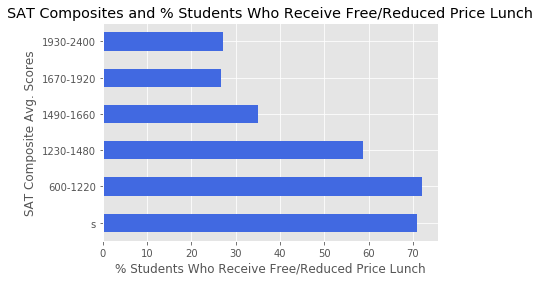

In [15]:
composite_frl = (composite_demos_grouped['frl_percent'].
                 plot.barh(rot=0, title = 'SAT Composites and % Students Who Receive Free/Reduced Price Lunch',
                           legend = False, color = ['royalblue']))
plt.xlabel("% Students Who Receive Free/Reduced Price Lunch")
plt.ylabel("SAT Composite Avg. Scores")

- Schools with mean scores in the top two score ranges (both boxplots in middle) tend to have less free/reduced lunch recipients enrolled, as evidenced by the short whisker lengths. The average income level of students in these schools thus seems to lack diversity. 
- The leftmost boxplot (fourth score range) has the longest whiskers. Presumably, schools who on average score within this range have a more diverse range of student income level. This means that the typical income level of students at these schools varies from school to school.

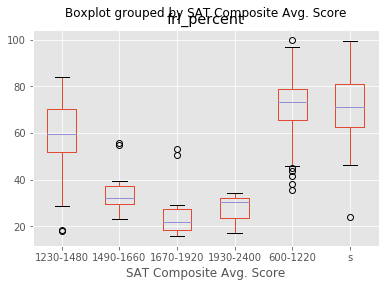

In [16]:
sat_demos.boxplot(by = 'SAT Composite Avg. Score', column = 'frl_percent')

<a class="anchor" id="bar_enrolled"></a> 
### SAT Composite Scores & Percent Enrolled Who Took SAT

The bar plot below demonstrates the average percentage of test takers of schools for each SAT composite score range.

- For example, the mean percent of test takers for schools with an average SAT score in the 1490-1660 range is about 18%.

- Suppressed data points were not shown because # of test takers is < 5.

Text(0, 0.5, 'SAT Composite Avg. Scores')

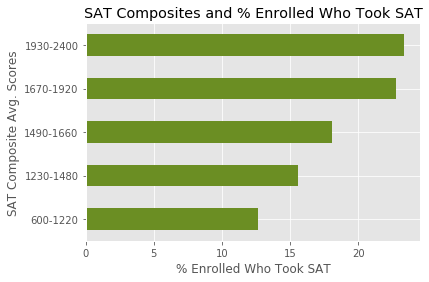

In [17]:
composite_takers = (composite_demos_grouped['Percent of Students Enrolled Who Took SAT'].iloc[1:].
                 plot.barh(rot=0, title = 'SAT Composites and % Enrolled Who Took SAT',
                           legend = False, color = ['olivedrab']))
plt.xlabel("% Enrolled Who Took SAT")
plt.ylabel("SAT Composite Avg. Scores")

The percent of students enrolled who took the SAT does not seem to differ that much across schools whose average SAT scores are in different score ranges. 

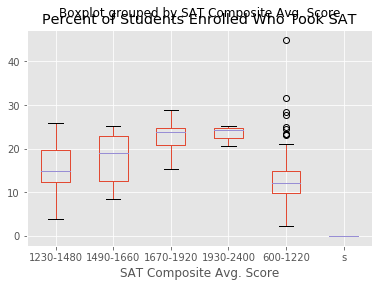

In [18]:
sat_demos.boxplot(by = 'SAT Composite Avg. Score', column = 'Percent of Students Enrolled Who Took SAT')

<a class="anchor" id="bh_vs"></a> 
The below statistics and boxplots further show discrepancies between average SAT scores of schools with either predominantly Black/Hispanic or Asian/White students.

These statistics are based on the average SAT composite scores of schools. 
- For example, among schools with predominantly Black/Hispanic students, the median of these schools' average SAT scores is 1166. The highest average SAT score among these schools is 1547.

In [19]:
#schools with majority black and hispanic students
sat_raws_bh = sat_demos.loc[sat_demos['Black/Hispanic'] == 100]['SAT Composite Avg. Raw Score']
bh_std = np.std(sat_raws_bh)
bh_mean = np.mean(sat_raws_bh)
bh_min = min(sat_raws_bh)
bh_max = max(sat_raws_bh)
bh_med = np.median(sat_raws_bh)
bh_stats = (pd.DataFrame(data={'The Average SAT Composite Score for Predominantly Black/Hispanic Schools':
                               [bh_mean, bh_std, bh_med, bh_min, bh_max]},
                         index = ['Mean', 'Standard Deviation', 'Median', 'Minimum', 'Maximum']))
bh_stats

,The Average SAT Composite Score for Predominantly Black/Hispanic Schools
Mean,1164.095607
Standard Deviation,96.587905
Median,1166.000000
Minimum,887.000000
Maximum,1547.000000


In [20]:
#schools with majority asian and white students
sat_raws_aw = sat_demos.loc[sat_demos['Asian/White'] == 100]['SAT Composite Avg. Raw Score']
aw_std = np.std(sat_raws_aw)
aw_mean = np.mean(sat_raws_aw)
aw_min = min(sat_raws_aw)
aw_max = max(sat_raws_aw)
aw_med = np.median(sat_raws_aw)
aw_stats = (pd.DataFrame(data={'The Average SAT Composite Score for Predominantly Asian/White Schools':
                               [aw_mean, aw_std, aw_med, aw_min, aw_max]},
                         index = ['Mean', 'Standard Deviation', 'Median', 'Minimum', 'Maximum']))
aw_stats

,The Average SAT Composite Score for Predominantly Asian/White Schools
Mean,1462.888889
Standard Deviation,261.220950
Median,1426.000000
Minimum,981.000000
Maximum,2096.000000


- The boxplot showing schools with predominantly Asian/White students' average SAT scores has no outliers. 
- This boxplot on the left has much longer whiskers and a wider interquartile range than the boxplot of schools with predominantly Black/Hispanic students' average SAT scores.
- The outlier schools out of the predominantly Black/Hispanic schools are, for the most part, hardly above the 50th percentile for predominantly Asian/White schools, indicating the considerable differences in SAT performance between these schools.

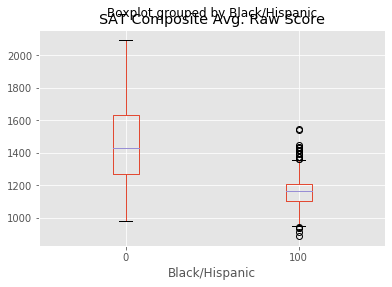

In [21]:
#100: schools with majority Black/Hispanic students
#0: schools with majority Asian/White students
sat_demos.boxplot(by = 'Black/Hispanic', column='SAT Composite Avg. Raw Score')

<a class="anchor" id="distribs"></a> 
## Comparing Distributions

The noticeable differences seen in the bar plots and boxplots will be further shown when comparing the distributions between predominantly Black/Hispanic schools versus predominantly Asian/White schools.

To get an idea of what the distribution of SAT score should look like for all schools, despite demographics, I used the [2012 nationwide mean and standard deviation for rising seniors' SAT composite scores](https://secure-media.collegeboard.org/digitalServices/pdf/research/SAT-Percentile-Ranks-Composite-CR-M-W-2012.pdf).

This histogram below is a rough "normal" (expected) distribution of this. I will use this histogram to see if the distributions of predominantly Asian/White schools versus predominantly Black/Hispanic schools are different from each other and/or the nationwide, expected distribution.

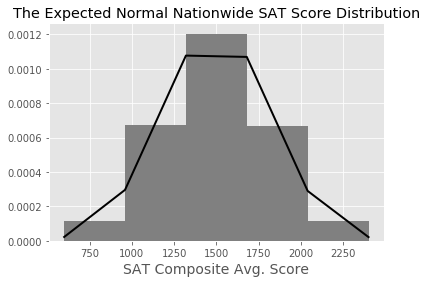

In [22]:
#sd and mean from above data source
sd = 316
mean = 1498

#simulate a normal distribution from 1,000,000 random samples using mean, sd
normal_composite = np.random.normal(mean, sd, 1000000)

#draw probability histogram 
counts, bins, ignored = plt.hist(normal_composite, 5, (600, 2400), density=True, color='gray')
x = 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * sd**2)) 
plt.plot(bins, x, color='black', linewidth = 2)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.title("The Expected Normal Nationwide SAT Score Distribution")
plt.show()           

### By Ethnic Majority

<a class="anchor" id="distrib_bh"></a> 
Score distribution for schools with predominantly Black/Hispanic students 

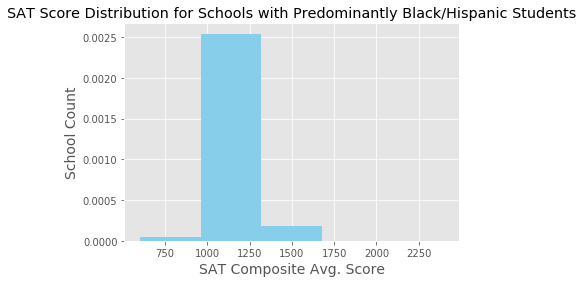

In [23]:
#plot histogram with raw data
plt.hist(sat_raws_bh, 5, (600, 2400), color='skyblue', density=True)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Black/Hispanic Students")
plt.show()

<a class="anchor" id="distrib_aw"></a> 
Score distribution for schools with predominantly Asian/White students

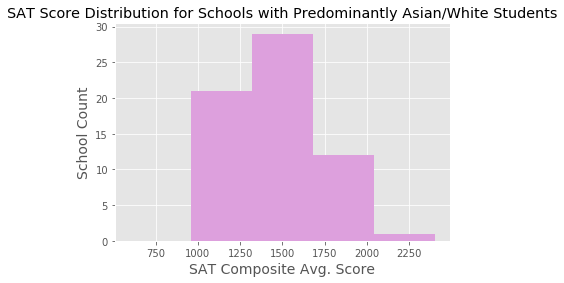

In [24]:
plt.hist(sat_raws_aw, 5, (600, 2400), color='plum')
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Asian/White Students")
plt.show()

<a class="anchor" id="bh_nation"></a> 
The score distribution for schools with a Black/Hispanic majority is unimodal and centered obviously left of the expected normal distribution.

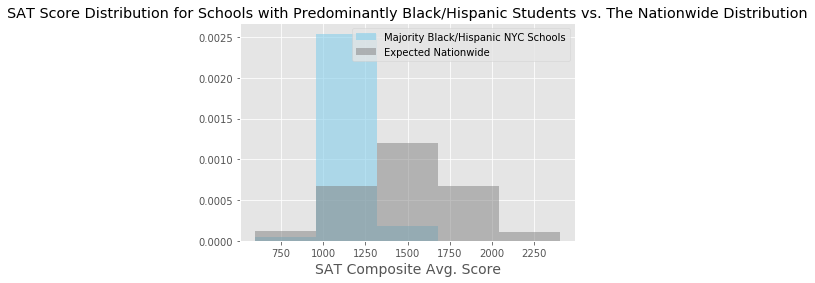

In [25]:
plt.hist(sat_raws_bh, 5, (600, 2400), alpha = 0.6, color='skyblue',density=True, label = ['Majority Black/Hispanic NYC Schools'])
(plt.hist(np.random.normal(mean, sd, 1000000), 5, (600, 2400), alpha = 0.5, color='gray', density=True,
         label = ['Expected Nationwide']))
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Black/Hispanic Students vs. The Nationwide Distribution")
plt.legend()
plt.show()

<a class="anchor" id="aw_nation"></a> 
The SAT score distribution for schools with an Asian/White majority has a similar center to the expected normal nationwide distribution, but is slightly skewed right.

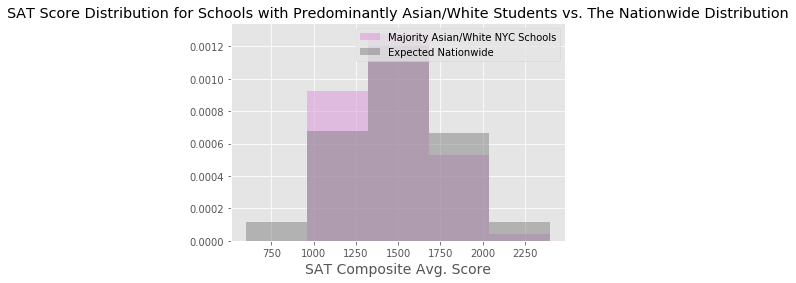

In [26]:
(plt.hist(sat_raws_aw, 5, (600, 2400), alpha = 0.6, color='plum', density=True, 
          label = ['Majority Asian/White NYC Schools']))
(plt.hist(np.random.normal(mean, sd, 1000000), 5, (600, 2400), alpha = 0.5, color='gray', density=True, 
         label = ['Expected Nationwide']))
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Asian/White Students vs. The Nationwide Distribution")
plt.legend()
plt.show()

<a class="anchor" id="bh_aw_distrib"></a> 
- As seen in the overlaid histograms above and the one below, schools with more Asian/White students more often score at and/or above the national average.

- Students in schools with a Black/Hispanic majority on average score lower than students nationwide and at schools with more Asian/White students.

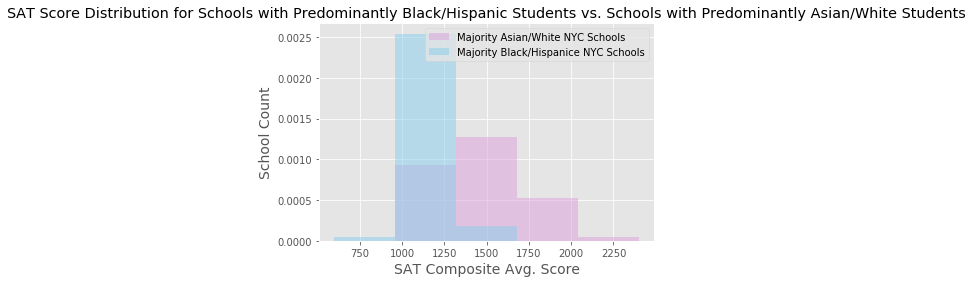

In [27]:
(plt.hist(sat_raws_aw, 5, (600, 2400), alpha = 0.5, color='plum', density=True, 
          label = ['Majority Asian/White NYC Schools']))
(plt.hist(sat_raws_bh, 5, (600, 2400), alpha = 0.5, color='skyblue',density=True,
         label = ['Majority Black/Hispanice NYC Schools']))
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distribution for Schools with Predominantly Black/Hispanic Students vs. Schools with Predominantly Asian/White Students")
plt.legend()
plt.show()

<a class="anchor" id="frl_distrib"></a> 
### SAT Scores vs. Schools' Students' Socioeconomic Status

In [28]:
#divide data by frl_percent median
scores_lower_frl = sat_demos.loc[sat_demos['frl_percent'] <= frl_med]['SAT Composite Avg. Raw Score']
scores_higher_frl = sat_demos.loc[sat_demos['frl_percent'] > frl_med]['SAT Composite Avg. Raw Score']

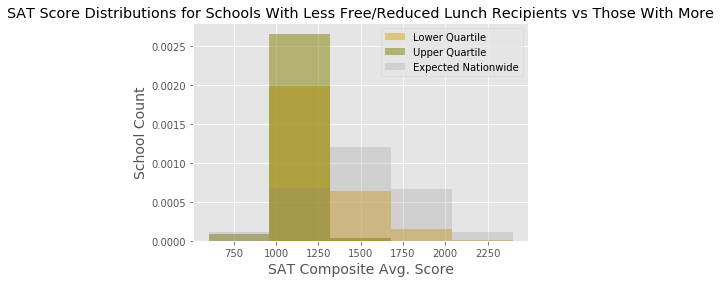

In [29]:
(plt.hist(scores_lower_frl, 5, (600, 2400), color='goldenrod', alpha = 0.5, density = True,
         label = ['Lower Quartile']))
(plt.hist(scores_higher_frl, 5, (600, 2400), color='olive', alpha = 0.5, density = True,
         label = ['Upper Quartile']))
(plt.hist(np.random.normal(mean, sd, 1000000), 5, (600, 2400), alpha = 0.2, color='gray', density=True, 
         label = ['Expected Nationwide']))
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("School Count", size=14)
plt.title("SAT Score Distributions for Schools With Less Free/Reduced Lunch Recipients vs Those With More")
plt.legend()
plt.show()

Schools with less students that receive free/reduced lunch, and thus less students in lower socioeconomic classes, have more students that score above the national and NYC average on the SAT.

This right tail for schools with less free/reduced lunch recipeients is more significant than those of the histograms plotting score distributions for schools with an Asian/White majority student body. 
- Such evidence hints that diffrences in socioeconomic class are more significant than ethnic differences when it somes to SAT scores.

<a class="anchor" id="borough_distrib"></a> 
### By Borough
Another way to look at how socioeconomic class and SAT scores may be related is to look at schools' data by the schools' boroughs (Manhattan, Brooklyn, Bronx, Queens, and Staten Island). The letters in the school's DBN (unique identifier) indicate which borough/county it is located in. M is for Manhattan County/Borough, K is for Kings County (Brooklyn), X is for Bronx County/Borough, Q is for Queens County/Borough, and R is for Richmond County (Staten Island).

According to the [census data](https://www.census.gov/quickfacts/fact/table/newyorkcountymanhattanboroughnewyork,bronxcountybronxboroughnewyork,queenscountyqueensboroughnewyork,kingscountybrooklynboroughnewyork,richmondcountystatenislandboroughnewyork,newyorkcitynewyork/HSG010219), based on median household income in 2018 dollars (2014-2018), the boroughs are ranked from highest to lowest median househould income as below:
1. Manhattan
2. Staten Island
3. Queens
4. Brooklyn
5. Bronx

I will look at schools from each borough and compare the distributions for schools in the different boroughs.

In [30]:
#create separate lists containing the scores from schools of each borough to later be used for hists
scores = []
m_scores = []
r_scores = []
q_scores = []
k_scores = []
x_scores = []
sat_demos['Manhattan'] = 0
sat_demos['Staten Island'] = 0
sat_demos['Queens'] = 0
sat_demos['Brooklyn'] = 0
sat_demos['Bronx'] = 0
for i, row in sat_demos.iterrows():
    dbn = row['DBN']
    score = row['SAT Composite Avg. Raw Score']
    scores.append(score)
    if 'M' in dbn:
        m_scores.append(score)
        sat_demos.at[i,'Manhattan'] = 100
    elif 'Q' in dbn:
        q_scores.append(score)
        sat_demos.at[i,'Queens'] = 100
    elif 'K' in dbn:
        k_scores.append(score)
        sat_demos.at[i,'Brooklyn'] = 100
    elif 'X' in dbn:
        x_scores.append(score)
        sat_demos.at[i,'Bronx'] = 100
    elif 'R' in dbn:
        r_scores.append(score)
        sat_demos.at[i,'Staten Island'] = 100

In [31]:
#update dataset to include borough data
sat_demos.to_csv('sat_demos_with_boroughs')

The distributions for Manhattan, Queens, and Staten Island all have a more significant right skew, meaning that more schools in these boroughs score higher than schools in Brooklyn and the Bronx.

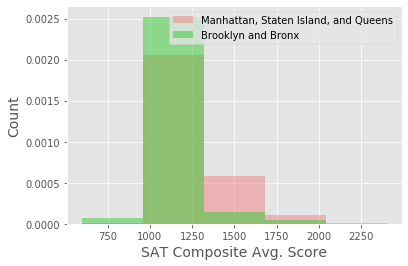

In [32]:
plt.hist(m_scores+r_scores+q_scores, 5, (600, 2400), color='lightcoral', alpha = 0.5, label=['Manhattan, Staten Island, and Queens'], density=True)
plt.hist(k_scores+x_scores, 5, (600, 2400), color='limegreen', alpha = 0.5, label=['Brooklyn and Bronx'], density=True)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.legend()
plt.show()

Manhattan's histogram has the longest right tail, indicating more of its students scored above average on the SAT. 

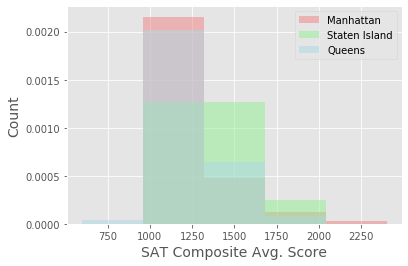

In [33]:
plt.hist(m_scores, 5, (600, 2400), color='lightcoral', alpha = 0.5, label=['Manhattan'], density=True)
plt.hist(r_scores, 5, (600, 2400), color='lightgreen', alpha = 0.5, label=['Staten Island'], density=True)
plt.hist(q_scores, 5, (600, 2400), color='lightblue', alpha = 0.5, label=['Queens'], density=True)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.legend()
plt.show()

Staten Island's histogram is the only one centered at around 1250-1500 (the average score range), where the others are centered at 1000-1250 (below average). 


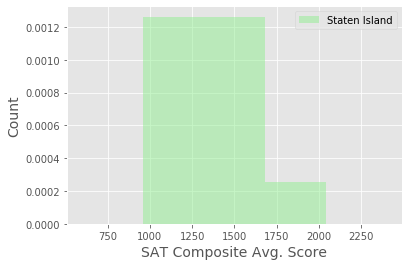

In [34]:
plt.hist(r_scores, 5, (600, 2400), color='lightgreen', alpha = 0.5, label=['Staten Island'], density=True)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.legend()

The distributions for Bronx and Brooklyn are largely similar.

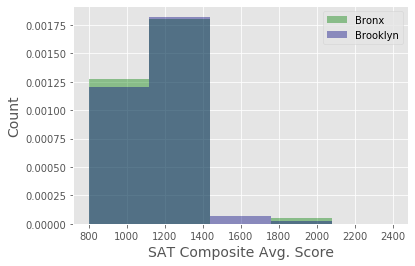

In [35]:
plt.hist(x_scores, 5, (800, 2400), color='green', alpha = 0.4, label=['Bronx'], density=True)
plt.hist(k_scores, 5, (800, 2400), color='navy', alpha = 0.4, label=['Brooklyn'], density=True)
plt.xlabel('SAT Composite Avg. Score', size=14)
plt.ylabel("Count", size=14)
plt.legend()
plt.show()

All of this information seem to point out that the higher a borough's median income, the more students score higher on the SAT.

These visualizations and differences in distribution show that differences in a schools' students' ethnicity and income level are related to differences in SAT performance.

Please refer to [this notebook](https://github.com/jacquelinekclee/data_cleaning_exploration_nyc_schools_sat/blob/master/linear_regression_sat_ny.ipynb) to see Linear Regression models being used to evaluate the relationships (and their validity) between the average score of students at a school and a school's ethnic breakdown, income level, and location.